- composite function

In [9]:
import torch
# import torch.nn.functional as F

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [30]:
iris = load_iris()
x = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target)

In [45]:
class MyModel:
  def __init__(self) -> None:
    self.w12 = torch.rand((4, 4), requires_grad=True)
    self.b12 = torch.rand((4), requires_grad=True)
    self.w23 = torch.rand((4, 3), requires_grad=True)
    self.b23 = torch.rand((3), requires_grad=True)

    self.criterion = torch.nn.CrossEntropyLoss()

  def forward(self, x):
    h = x @ self.w12 + self.b12
    h = torch.sigmoid(h)
    h = h @ self.w23 + self.b23

    self.loss = self.criterion(h, y)

    return self.loss

  def predict(self, x):
    h = x @ self.w12 + self.b12
    h = torch.sigmoid(h)
    h = h @ self.w23 + self.b23
    return torch.argmax(h, dim=1)


  def backward(self):
    if self.w12.grad is not None:
      self.w12.grad.zero_()
    if self.b12.grad is not None:
      self.b12.grad.zero_()
    if self.w23.grad is not None:
      self.w23.grad.zero_()
    if self.b23.grad is not None:
      self.b23.grad.zero_()

    self.loss.backward()

  def update(self, w12g, b12g, w23g, b23g, lr):
    self.w12.data -= lr*w12g
    self.b12.data -= lr*b12g
    self.w23.data -= lr*w23g
    self.b23.data -= lr*b23g

In [46]:
model = MyModel()
for idx in range(10001):
  loss = model.forward(x)
  model.backward()
  model.update(model.w12.grad,
              model.b12.grad,
              model.w23.grad,
              model.b23.grad,
              0.1)

In [47]:
pred = model.predict(x)
pred

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [51]:
(pred == y).float().mean() * 100

tensor(96.6667)

In [27]:
print(h.dtype)
print(y.dtype)
print(h.shape)
print(y.shape)

torch.float32
torch.int64
torch.Size([150, 3])
torch.Size([150, 3])


- updating the value of tensors

In [1]:
import torch
import matplotlib.pyplot as plt

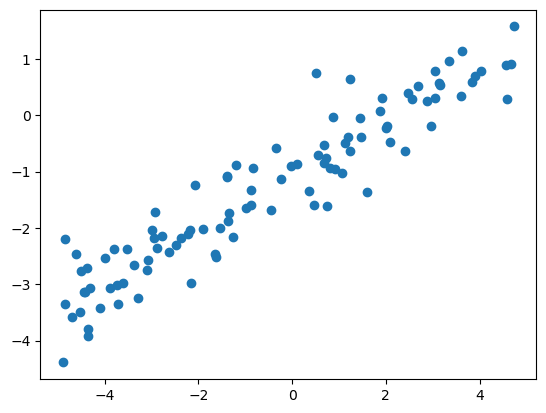

In [2]:
x = (torch.rand(100) - 0.5) * 10
y = torch.normal(x * 0.5 - 1, 0.5)

plt.scatter(x, y)

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

def update_(w, b, loss, lr=0.001):
  if w.grad.data > 0:
    w.data -= torch.clamp(0.01 * w.grad.data, loss.data * lr, loss.data)
  else:
    w.data -= torch.clamp(0.01 * w.grad.data, -loss.data, -lr * loss.data)

  if b.grad.data > 0:
    b.data -= torch.clamp(0.01 * b.grad.data, loss.data * lr, loss.data)
  else:
    b.data -= torch.clamp(0.01 * b.grad.data, -loss.data, -lr * loss.data)

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  update_(w, b, loss, 0.00001)
  
  if idx%100 == 0:
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

In [56]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  w.data -= 0.01 * w.grad.data
  b.data -= 0.01 * b.grad.data
  if idx%100 == 0:
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

  



w: [0.56598467], b: [0.7354859]
tensor(2.9960, grad_fn=<DivBackward0>)
w: [0.51271], b: [-0.66650647]
tensor(0.3432, grad_fn=<DivBackward0>)
w: [0.49666694], b: [-0.8694389]
tensor(0.2881, grad_fn=<DivBackward0>)
w: [0.49433726], b: [-0.8989076]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49399897], b: [-0.9031868]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49394986], b: [-0.9038083]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49394274], b: [-0.9038984]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49394175], b: [-0.9039115]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939417], b: [-0.9039122]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939417], b: [-0.9039122]
tensor(0.2869, grad_fn=<DivBackward0>)


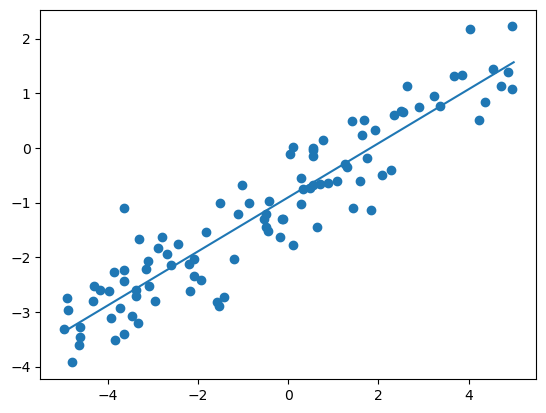

In [57]:
tx = torch.linspace(-5, 5, 100)
ty = w * tx + b
plt.scatter(x, y)
plt.plot(tx.detach().numpy(), ty.detach().numpy())

In [64]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  w.data -= torch.clamp(0.01 * w.grad.data, 0.001, 1) if w.grad.data > 0 else torch.clamp(0.01 * w.grad.data, -1, -0.001)
  b.data -= torch.clamp(0.01 * b.grad.data, 0.001, 1) if b.grad.data > 0 else torch.clamp(0.01 * b.grad.data, -1, -0.001)
  if idx%100 == 0:
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

  



w: [0.11779439], b: [0.12653917]
tensor(3.6823, grad_fn=<DivBackward0>)
w: [0.5043445], b: [-0.7603908]
tensor(0.3075, grad_fn=<DivBackward0>)
w: [0.49434465], b: [-0.8995342]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49434465], b: [-0.9035342]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49434465], b: [-0.9035342]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49434465], b: [-0.9035342]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49434465], b: [-0.9035342]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49434465], b: [-0.9035342]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49434465], b: [-0.9035342]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49434465], b: [-0.9035342]
tensor(0.2869, grad_fn=<DivBackward0>)


In [68]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  if w > 0:
    w.data -= torch.clamp(0.01 * w.grad.data, w.data * 0.01, w.data * 2) if w.grad.data > 0 else torch.clamp(0.01 * w.grad.data, w.data * -0.01, w.data * -2)
  else :
    w.data -= torch.clamp(0.01 * w.grad.data, w.data * -2, w.data * -0.01) if w.grad.data > 0 else torch.clamp(0.01 * w.grad.data, w.data * 2, w.data * 0.01)

  if b > 0:
    b.data -= torch.clamp(0.01 * b.grad.data, b.data * 0.01, b.data * 2) if b.grad.data > 0 else torch.clamp(0.01 * b.grad.data, b.data * -0.01, b.data * -2)
  else :
    b.data -= torch.clamp(0.01 * b.grad.data, b.data * -2, b.data * -0.01) if b.grad.data > 0 else torch.clamp(0.01 * b.grad.data, b.data * 2, b.data * 0.01)

  if idx%100 == 0:
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

  



w: [0.36318594], b: [0.46041545]
tensor(3.9451, grad_fn=<DivBackward0>)
w: [0.5888276], b: [-0.01300656]
tensor(1.0620, grad_fn=<DivBackward0>)
w: [0.6882444], b: [-0.03518032]
tensor(1.2179, grad_fn=<DivBackward0>)
w: [1.093733], b: [-0.0951562]
tensor(4.3058, grad_fn=<DivBackward0>)
w: [0.56060386], b: [-0.2573797]
tensor(0.6976, grad_fn=<DivBackward0>)
w: [0.6925297], b: [-0.60521334]
tensor(0.7371, grad_fn=<DivBackward0>)
w: [0.50077933], b: [-0.8936518]
tensor(0.2880, grad_fn=<DivBackward0>)
w: [0.59702516], b: [-0.82958806]
tensor(0.4022, grad_fn=<DivBackward0>)
w: [1.3150876], b: [-0.88620013]
tensor(8.0178, grad_fn=<DivBackward0>)
w: [0.54739815], b: [-0.85814846]
tensor(0.3180, grad_fn=<DivBackward0>)


In [69]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  if w > 0:
    w.data -= torch.clamp(0.01 * w.grad.data, w.data * 0.01, w.data * 2) if w.grad.data > 0 else torch.clamp(0.01 * w.grad.data, w.data * -0.01, w.data * -2)
  else :
    w.data -= torch.clamp(0.01 * w.grad.data, w.data * -2, w.data * -0.01) if w.grad.data > 0 else torch.clamp(0.01 * w.grad.data, w.data * 2, w.data * 0.01)

  if b > 0:
    b.data -= torch.clamp(0.01 * b.grad.data, b.data * 0.01, b.data * 2) if b.grad.data > 0 else torch.clamp(0.01 * b.grad.data, b.data * -0.01, b.data * -2)
  else :
    b.data -= torch.clamp(0.01 * b.grad.data, b.data * -2, b.data * -0.01) if b.grad.data > 0 else torch.clamp(0.01 * b.grad.data, b.data * 2, b.data * 0.01)

  if idx%100 == 0:
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

w: [0.9156932], b: [0.912325]
tensor(4.5526, grad_fn=<DivBackward0>)
w: [0.583197], b: [-0.00916092]
tensor(1.0649, grad_fn=<DivBackward0>)
w: [0.6674673], b: [-0.02477858]
tensor(1.1745, grad_fn=<DivBackward0>)
w: [1.0092293], b: [-0.06702148]
tensor(3.3573, grad_fn=<DivBackward0>)
w: [0.5550321], b: [-0.18128058]
tensor(0.7932, grad_fn=<DivBackward0>)
w: [0.63230014], b: [-0.46177474]
tensor(0.6106, grad_fn=<DivBackward0>)
w: [1.4717175], b: [-0.9051632]
tensor(0.2871, grad_fn=<DivBackward0>)
w: [0.55657685], b: [-0.8573546]
tensor(0.3295, grad_fn=<DivBackward0>)
w: [0.9785928], b: [-0.8623541]
tensor(2.9587, grad_fn=<DivBackward0>)
w: [0.52632225], b: [-0.8866158]
tensor(0.2983, grad_fn=<DivBackward0>)


In [73]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

def update_(w, b, loss, lr=0.001):
  w.data -= torch.clamp(0.01 * w.grad.data, loss.data * lr, loss.data) if w.grad.data > 0 else torch.clamp(0.01 * w.grad.data, -loss.data, -lr * loss.data)
  b.data -= torch.clamp(0.01 * b.grad.data, loss.data * lr, loss.data) if b.grad.data > 0 else torch.clamp(0.01 * b.grad.data, -loss.data, -lr * loss.data)
  

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  update_(w, b, loss, 0.00001)
  
  if idx%100 == 0:
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

w: [0.86700624], b: [0.9231272]
tensor(4.2895, grad_fn=<DivBackward0>)
w: [0.5151222], b: [-0.63599324]
tensor(0.3586, grad_fn=<DivBackward0>)
w: [0.49701723], b: [-0.8650078]
tensor(0.2884, grad_fn=<DivBackward0>)
w: [0.49438813], b: [-0.89826417]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49400154], b: [-0.9030955]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49395004], b: [-0.90379953]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49394432], b: [-0.903914]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49394432], b: [-0.903914]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49394432], b: [-0.903914]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49394432], b: [-0.903914]
tensor(0.2869, grad_fn=<DivBackward0>)


In [78]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

def update_(w, b, loss, lr=0.001):
  w.data -= torch.clamp(0.01 * w.grad.data, loss.data * lr, loss.data) if w.grad.data > 0 else torch.clamp(0.01 * w.grad.data, -loss.data, -lr * loss.data)
  b.data -= torch.clamp(0.01 * b.grad.data, loss.data * lr, loss.data) if b.grad.data > 0 else torch.clamp(0.01 * b.grad.data, -loss.data, -lr * loss.data)
  
lr = 0.01

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  update_(w, b, loss, lr)
  
  if idx%100 == 0:
    lr /= 10
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

w: [0.6527158], b: [0.29694048]
tensor(1.7922, grad_fn=<DivBackward0>)
w: [0.5074904], b: [-0.7288154]
tensor(0.3175, grad_fn=<DivBackward0>)
w: [0.49595138], b: [-0.8784904]
tensor(0.2875, grad_fn=<DivBackward0>)
w: [0.49423337], b: [-0.90022206]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939839], b: [-0.9033778]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939477], b: [-0.9038358]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939424], b: [-0.9039024]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939417], b: [-0.9039122]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939417], b: [-0.9039122]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939417], b: [-0.9039122]
tensor(0.2869, grad_fn=<DivBackward0>)


In [79]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

def update_(w, b, loss, lr=0.001):
  w.data -= torch.clamp(0.01 * w.grad.data, loss.data * lr, loss.data) if w.grad.data > 0 else torch.clamp(0.01 * w.grad.data, -loss.data, -lr * loss.data)
  b.data -= torch.clamp(0.01 * b.grad.data, loss.data * lr, loss.data) if b.grad.data > 0 else torch.clamp(0.01 * b.grad.data, -loss.data, -lr * loss.data)
  
lr = 0.01

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  update_(w, b, loss, lr)
  
  if idx%100 == 0:
    lr /= 20
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

w: [0.57295877], b: [0.4012346]
tensor(1.9985, grad_fn=<DivBackward0>)
w: [0.50890326], b: [-0.7146581]
tensor(0.3227, grad_fn=<DivBackward0>)
w: [0.4961142], b: [-0.8764312]
tensor(0.2877, grad_fn=<DivBackward0>)
w: [0.49425703], b: [-0.89992285]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49398732], b: [-0.9033343]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939482], b: [-0.9038296]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49394247], b: [-0.90390146]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939417], b: [-0.9039121]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939417], b: [-0.9039122]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4939417], b: [-0.9039122]
tensor(0.2869, grad_fn=<DivBackward0>)


In [83]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

def update_(w, b, loss, lr=0.001):
  w.data -= torch.clamp(lr * w.grad.data, loss.data * lr, loss.data) if w.grad.data > 0 else torch.clamp(lr * w.grad.data, -loss.data, -lr * loss.data)
  b.data -= torch.clamp(lr * b.grad.data, loss.data * lr, loss.data) if b.grad.data > 0 else torch.clamp(lr * b.grad.data, -loss.data, -lr * loss.data)
  
lr = 0.01

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  update_(w, b, loss, lr)
  
  if idx%100 == 0:
    # lr /= 2
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

w: [0.31968033], b: [0.6445041]
tensor(3.6302, grad_fn=<DivBackward0>)
w: [0.51166975], b: [-0.68342257]
tensor(0.3355, grad_fn=<DivBackward0>)
w: [0.4933859], b: [-0.90170544]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49336803], b: [-0.90168756]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49335015], b: [-0.90167016]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49333227], b: [-0.90165526]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49331543], b: [-0.90164036]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49330053], b: [-0.90162545]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49328563], b: [-0.90161055]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49327073], b: [-0.90159565]
tensor(0.2869, grad_fn=<DivBackward0>)


In [84]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

def update_(w, b, loss, lr=0.001):
  w.data -= torch.clamp(lr * w.grad.data, loss.data * lr, loss.data) if w.grad.data > 0 else torch.clamp(lr * w.grad.data, -loss.data, -lr * loss.data)
  b.data -= torch.clamp(lr * b.grad.data, loss.data * lr, loss.data) if b.grad.data > 0 else torch.clamp(lr * b.grad.data, -loss.data, -lr * loss.data)
  
lr = 0.01

for idx in range(1000):
  pred = w * x + b
  loss = ((pred - y)**2).sum() / 100

  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()

  loss.backward()

  update_(w, b, loss, lr)
  
  if idx%100 == 0:
    lr /= 1.1
    print(f'w: {w.detach().numpy()}, b: {b.detach().numpy()}')
    print(loss)

w: [0.33367747], b: [0.67897666]
tensor(3.6633, grad_fn=<DivBackward0>)
w: [0.51398045], b: [-0.6343656]
tensor(0.3593, grad_fn=<DivBackward0>)
w: [0.49345583], b: [-0.9033957]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4934469], b: [-0.9033838]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49344093], b: [-0.90337783]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49343646], b: [-0.9033719]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.49343348], b: [-0.9033689]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.493432], b: [-0.9033659]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4934305], b: [-0.9033659]
tensor(0.2869, grad_fn=<DivBackward0>)
w: [0.4934305], b: [-0.9033659]
tensor(0.2869, grad_fn=<DivBackward0>)


In [85]:
lr

0.0038554328942953147